<a href="https://colab.research.google.com/github/Okelo123/-JavaScript-Website-with-Event-Handling/blob/main/python_wk7_Analyzing_Data_with_Pandas_and_Visualizing_Results_with_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


TASK 1: LOADING AND EXPLORING DATA

CSV file not found. Loading built-in Iris dataset instead.

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Data types:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species               object
dtype: object

Missing values before cleaning:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: 

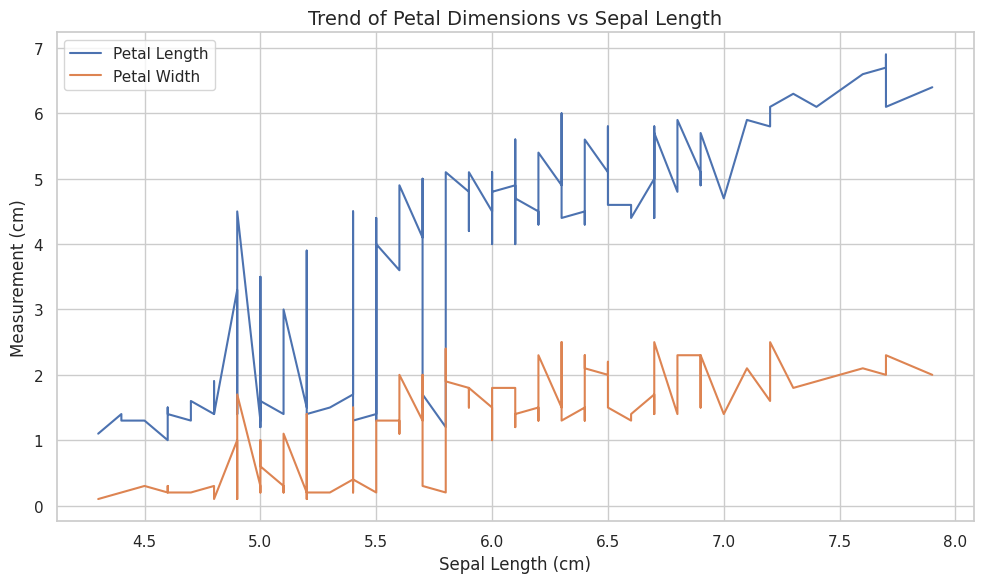


Generating Bar Chart...


<ipython-input-1-36fd18b2548e>:109: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='species', y='sepal length (cm)', data=data, ci=None, palette='viridis')
<ipython-input-1-36fd18b2548e>:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='species', y='sepal length (cm)', data=data, ci=None, palette='viridis')


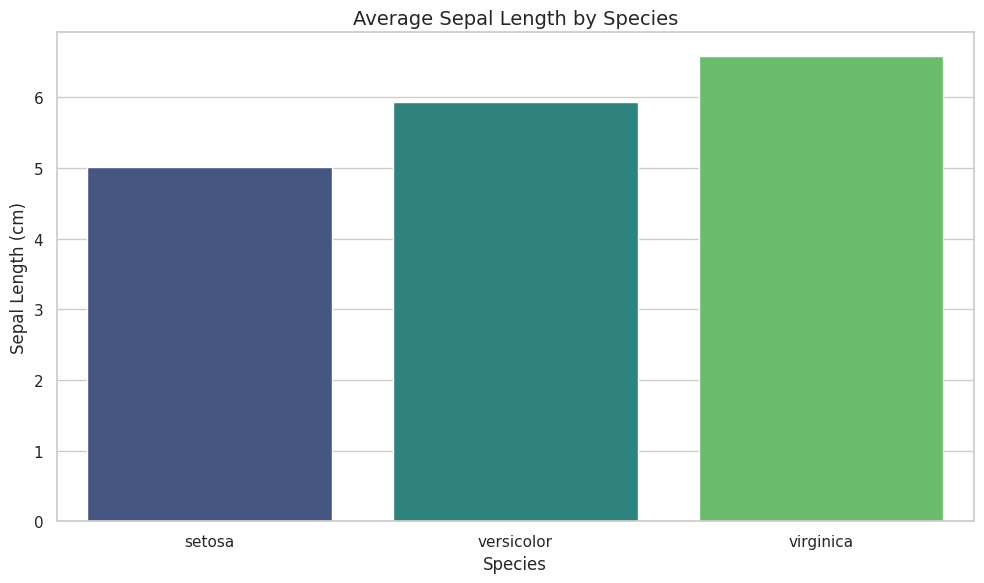


Generating Histogram...


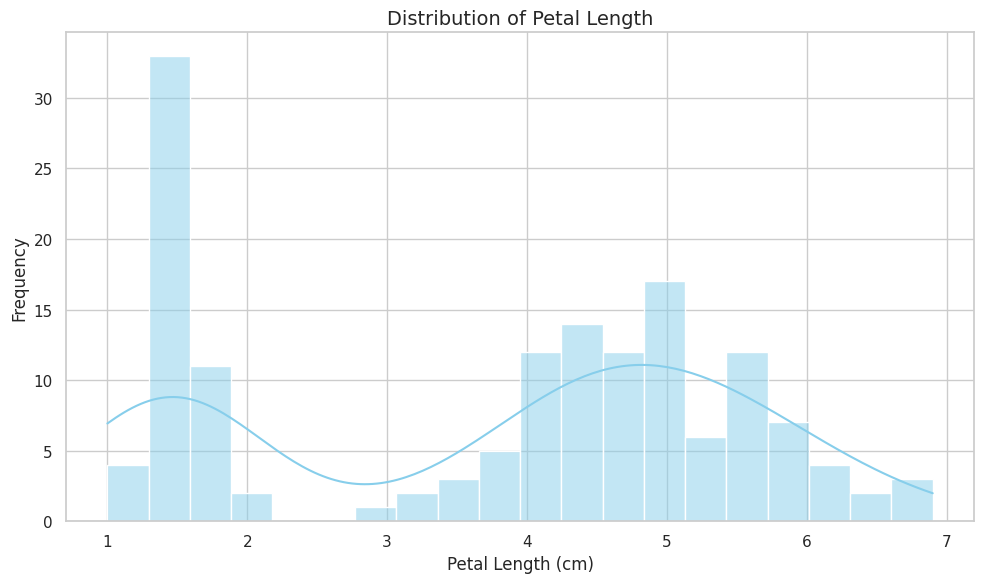


Generating Scatter Plot...


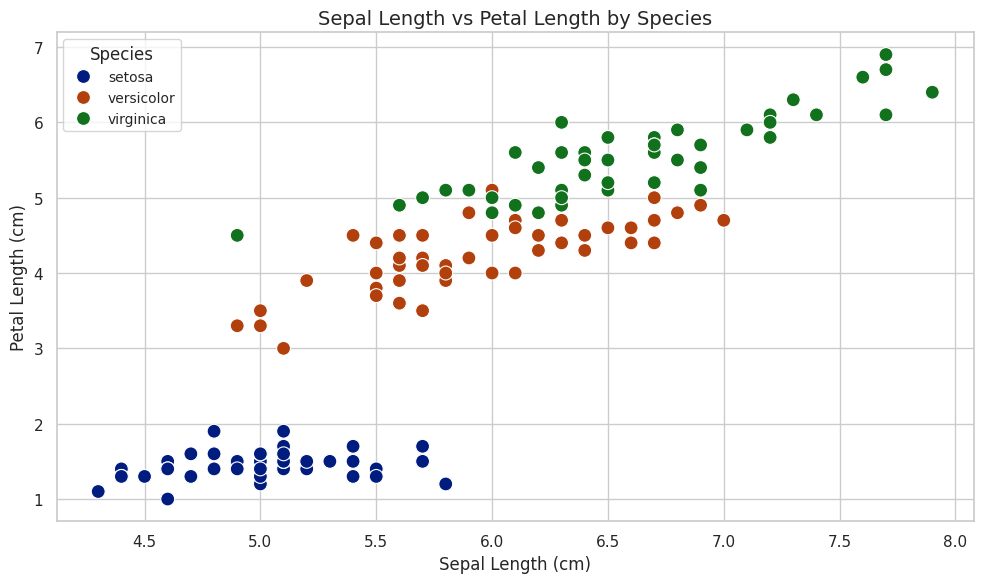


All visualizations saved as PNG files in the current directory

Analysis complete!


In [1]:
# Data Analysis and Visualization Script
# Covers all tasks: Loading, Exploring, Analyzing, and Visualizing data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# ============================================
# Task 1: Load and Explore the Dataset
# ============================================

def load_dataset():
    """Load the dataset with error handling"""
    try:
        # Try loading from CSV first
        data = pd.read_csv('iris.csv')
        print("Dataset loaded from CSV file")
    except FileNotFoundError:
        print("CSV file not found. Loading built-in Iris dataset instead.")
        iris = load_iris()
        data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
        data['species'] = iris.target
        data['species'] = data['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
    except Exception as e:
        print(f"Error loading dataset: {str(e)}")
        return None
    return data

print("\n" + "="*40)
print("TASK 1: LOADING AND EXPLORING DATA")
print("="*40 + "\n")

# Load the data
data = load_dataset()

if data is not None:
    # Display first few rows
    print("\nFirst 5 rows of the dataset:")
    print(data.head())

    # Check data structure
    print("\nData types:")
    print(data.dtypes)

    # Check for missing values
    print("\nMissing values before cleaning:")
    print(data.isnull().sum())

    # Clean data (though Iris dataset typically has no missing values)
    if data.isnull().sum().sum() > 0:
        data = data.dropna()
        print("\nMissing values after cleaning:")
        print(data.isnull().sum())
    else:
        print("\nNo missing values found - no cleaning needed")

# ============================================
# Task 2: Basic Data Analysis
# ============================================

if data is not None:
    print("\n" + "="*40)
    print("TASK 2: BASIC DATA ANALYSIS")
    print("="*40 + "\n")

    # Basic statistics
    print("\nBasic statistics of numerical columns:")
    print(data.describe())

    # Group by species and calculate means
    print("\nMean values by species:")
    print(data.groupby('species').mean())

    # Specific column analysis
    print("\nPetal length statistics by species:")
    print(data.groupby('species')['petal length (cm)'].agg(['mean', 'median', 'std']))

# ============================================
# Task 3: Data Visualization
# ============================================

if data is not None:
    print("\n" + "="*40)
    print("TASK 3: DATA VISUALIZATION")
    print("="*40 + "\n")

    # Set style for all plots
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    # Visualization 1: Line chart (simulated time series)
    print("\nGenerating Line Chart...")
    data_sorted = data.sort_values('sepal length (cm)')
    plt.plot(data_sorted['sepal length (cm)'], data_sorted['petal length (cm)'], label='Petal Length')
    plt.plot(data_sorted['sepal length (cm)'], data_sorted['petal width (cm)'], label='Petal Width')
    plt.title('Trend of Petal Dimensions vs Sepal Length', fontsize=14)
    plt.xlabel('Sepal Length (cm)', fontsize=12)
    plt.ylabel('Measurement (cm)', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.savefig('line_chart.png', dpi=300)
    plt.show()

    # Visualization 2: Bar chart
    print("\nGenerating Bar Chart...")
    plt.figure(figsize=(10, 6))
    sns.barplot(x='species', y='sepal length (cm)', data=data, ci=None, palette='viridis')
    plt.title('Average Sepal Length by Species', fontsize=14)
    plt.xlabel('Species', fontsize=12)
    plt.ylabel('Sepal Length (cm)', fontsize=12)
    plt.tight_layout()
    plt.savefig('bar_chart.png', dpi=300)
    plt.show()

    # Visualization 3: Histogram
    print("\nGenerating Histogram...")
    plt.figure(figsize=(10, 6))
    sns.histplot(data['petal length (cm)'], bins=20, kde=True, color='skyblue')
    plt.title('Distribution of Petal Length', fontsize=14)
    plt.xlabel('Petal Length (cm)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.savefig('histogram.png', dpi=300)
    plt.show()

    # Visualization 4: Scatter plot
    print("\nGenerating Scatter Plot...")
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='sepal length (cm)', y='petal length (cm)',
                    hue='species', data=data, palette='dark', s=100)
    plt.title('Sepal Length vs Petal Length by Species', fontsize=14)
    plt.xlabel('Sepal Length (cm)', fontsize=12)
    plt.ylabel('Petal Length (cm)', fontsize=12)
    plt.legend(title='Species', fontsize=10)
    plt.tight_layout()
    plt.savefig('scatter_plot.png', dpi=300)
    plt.show()

    print("\nAll visualizations saved as PNG files in the current directory")

print("\nAnalysis complete!")
